<h1>Analyzing Historical Stock/Revenue Data and Building a Dashboard</h1>

Pre-requisite codes

In [1]:
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4

import pandas as pd
import requests
from bs4 import BeautifulSoup

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ╸━━━━━━━━━━━━━━━╸━━━━━━━━   0.0 B /  ??.?MB @ 

In [7]:
!pip install yfinance==0.1.67
!pip install yfinance matplotlib
!pip install nbformat==4.2.0
import yfinance as yf
import matplotlib.pyplot as plt

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.40
    Uninstalling yfinance-0.2.40:
      Successfully uninstalled yfinance-0.2.40
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.8.0
    Uninstalling nbformat-5.8.0:
      Successfully uninstalled nbformat-5.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires nbformat>=5.2.0, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.7.4 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.
nbconvert 7.4.0 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.


In [3]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [43]:
from plotly.subplots import make_subplots
!pip install plotly

<h2>Question 1: Use yfinance to Extract Stock Data</h2>

Reset the index, save, and display the first five rows of the `tesla_data` dataframe using the `head` function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [4]:
tesla_yahoo = yf.Ticker("TSLA")

In [5]:
tesla_data = tesla_yahoo.history(period="max")

In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h2>Question 2: Use Webscraping to Extract Tesla Revenue Data</h2>

Display the last five rows of the `tesla_revenue` dataframe using the `tail` function. Upload a screenshot of the results.

In [18]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")
tesla_revenue= pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue=tesla_revenue.rename(columns = {'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace = False)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",","").str.replace("$","")
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [19]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


<h2>Question 3: Use yfinance to Extract Stock Data</h2>

Reset the index, save, and display the first five rows of the `gme_data` dataframe using the `head` function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [10]:
gme_yahoo = yf.Ticker("GME")
gme_data = gme_yahoo.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


<h2>Question 4: Use Webscraping to Extract GME Revenue Data</h2>

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Upload a screenshot of the results.

In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")
gme_revenue = pd.read_html(url, match = "GameStop Quarterly Revenue", flavor='bs4')[0]
gme_revenue = gme_revenue.rename(columns = {'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace = False)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",","").str.replace("$","")
gme_revenue.head()

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


In [25]:
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


<h2>Question 5: Plot Tesla Stock Graph</h2>

Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph.

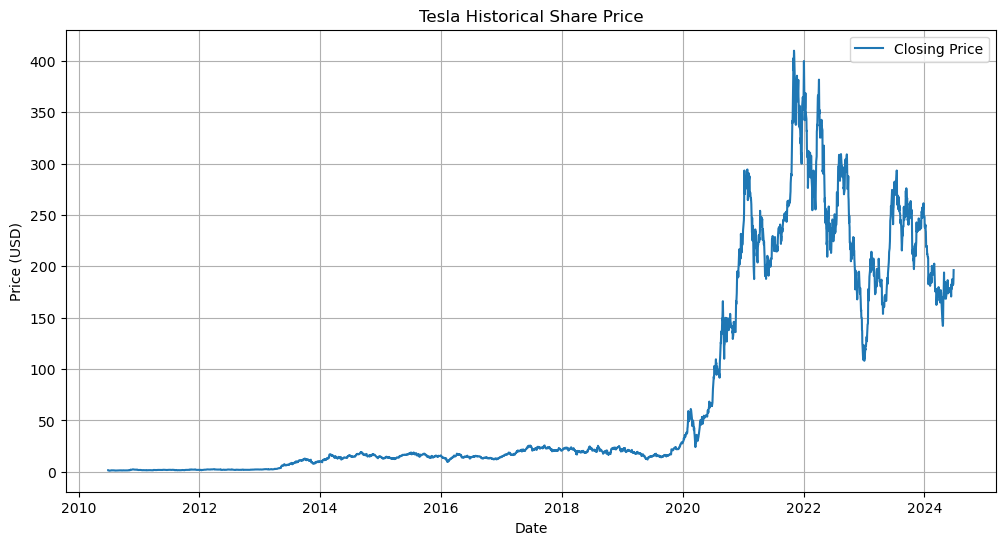

In [69]:
def make_graph(tesla_data, stock, title = None):
    plt.figure(figsize=(12, 6))
    plt.plot(tesla_data.index, tesla_data['Close'], label='Closing Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
make_graph(data, stock = "Tesla", title = "Tesla Historical Share Price")

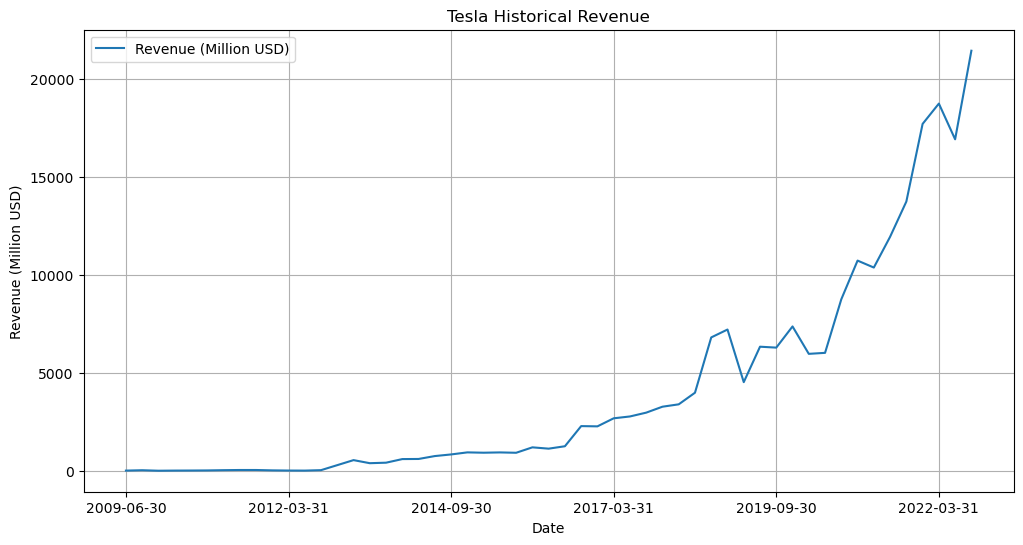

In [128]:
tesla_revenue_df = pd.DataFrame(tesla_revenue).iloc[::-1]
tesla_revenue_df['Revenue'] = tesla_revenue_df['Revenue'].astype(int)

def make_graph(tesla_revenue_df):
    plt.figure(figsize=(12, 6))
    plt.plot(tesla_revenue_df['Date'], tesla_revenue_df['Revenue'], label='Revenue (Million USD)')
    plt.xlabel('Date')
    plt.ylabel('Revenue (Million USD)')
    plt.title('Tesla Historical Revenue')
    plt.legend()
    plt.grid(True)
    plt.xticks(tesla_revenue_df['Date'][::10])
    plt.show()
    
make_graph(tesla_revenue_df)

<h2>Question 6: Plot GameStop Stock Graph</h2>

Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph.

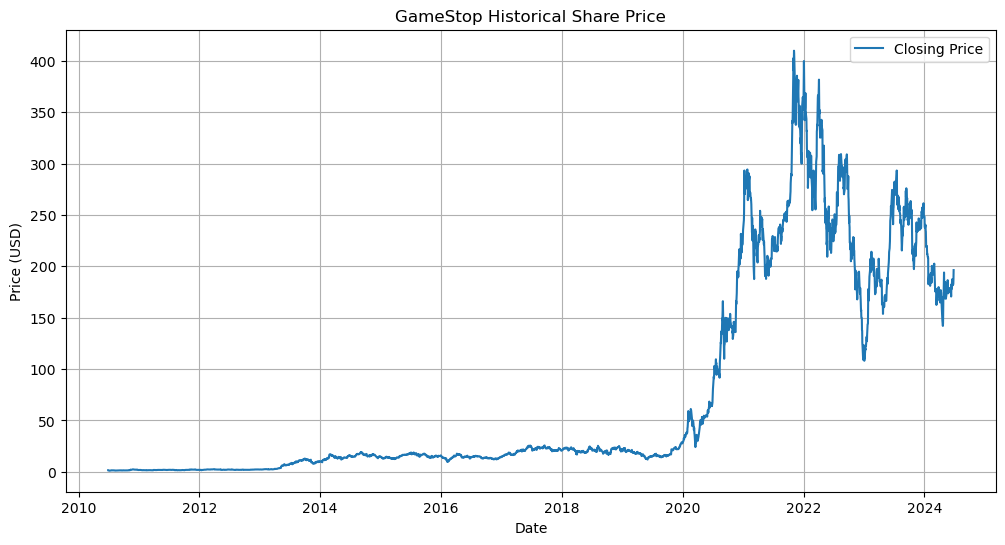

In [129]:
def make_graph(gme_data, stock, title = None):
    plt.figure(figsize=(12, 6))
    plt.plot(gme_data.index, gme_data['Close'], label='Closing Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
make_graph(data, stock = "GameStop", title = "GameStop Historical Share Price")

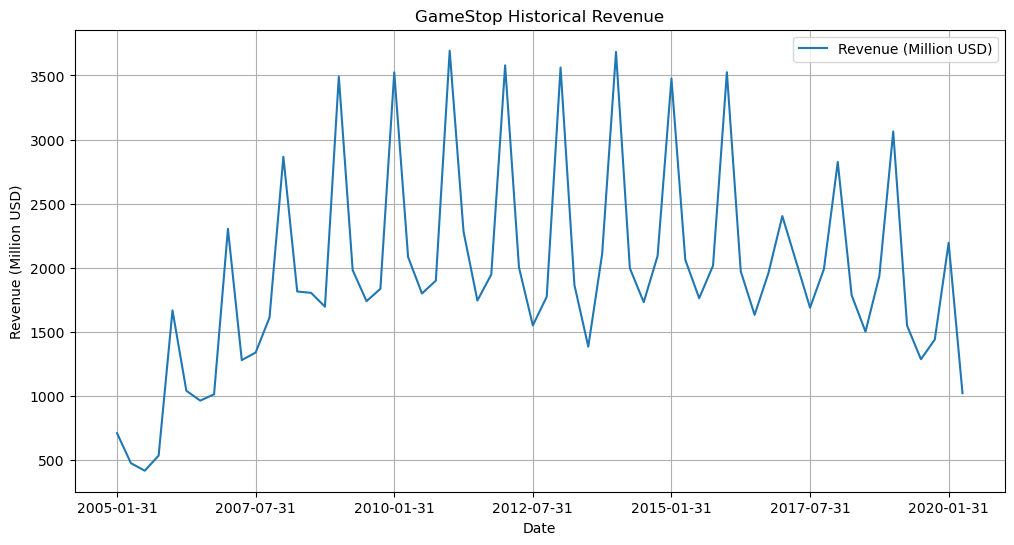

In [130]:
gme_revenue_df = pd.DataFrame(gme_revenue).iloc[::-1]
gme_revenue_df['Revenue'] = gme_revenue_df['Revenue'].astype(int)

def make_graph(gme_revenue_df):
    plt.figure(figsize=(12, 6))
    plt.plot(gme_revenue_df['Date'], gme_revenue_df['Revenue'], label='Revenue (Million USD)')
    plt.xlabel('Date')
    plt.ylabel('Revenue (Million USD)')
    plt.title('GameStop Historical Revenue')
    plt.legend()
    plt.grid(True)
    plt.xticks(gme_revenue_df['Date'][::10])
    plt.show()
    
make_graph(gme_revenue_df)